In [25]:
import mlrose
import numpy as np
import time
import gc
import sys
import matplotlib.pyplot as plt

In [12]:
input_sizes = range(10, 100, 10)

iterations = list(range(10, 90, 10))

print(iterations)

STATIC_INPUT_SIZE = 50
NUM_TRIALS = 15
ITERS_LIMIT = 40000

results = {}
algos = ["rhc", "sa", "ga", "mimic"]
problems = ["noisyDot", "consecutiveProduct", "paritySumDeep", "paritySumShallow"]

for problem in problems:
    results[problem] = {}
    for algo in algos:
        results[problem][algo] = {
            "iterationsGraph": {
                "iters":[],
                "fitness":[],
                "time": []
            },
            "problemSizeGraph": {
                "size": [],
                "fitness": [],
                "time": [],
            }
        }


[10, 20, 30, 40, 50, 60, 70, 80, 90, 100]


In [151]:

currentFitness = mlrose.fitness.ConsecutiveOneProductSum()

currentProblem = mlrose.DiscreteOpt(length = 50, fitness_fn = currentFitness, maximize=True, max_val=2)

for _ in range(0, NUM_TRIALS):                
    start_time = time.time()
    best_state, best_fitness, fitness_curve = mlrose.algorithms.simulated_annealing(currentProblem,
                                                                                    max_attempts=250,
                                                                                    max_iters=50000,
                                                                                    curve=True)

    elapsed_time = time.time() - start_time
    mean_time += elapsed_time
    mean_fitness += best_fitness

mean_time /= NUM_TRIALS
mean_fitness /= NUM_TRIALS
print(mean_fitness)

1461629.52256


In [ ]:
NUM_TRIALS = 15
for size in input_sizes:
    random_vector = np.random.uniform(-.5, .5, size)
    for algo in algos:
        for fitness in problems:
            
            currentFitness = None;
            
            if fitness == "noisyDot":
                currentFitness = mlrose.fitness.NoisyDotProduct(random_vector)
            elif fitness == "consecutiveProduct":
                currentFitness = mlrose.fitness.ConsecutiveOneProductSum()
            elif fitness == "paritySumDeep":
                currentFitness = mlrose.fitness.ParitySum(5)
            elif fitness == "paritySumShallow":
                currentFitness = mlrose.fitness.ParitySum(1.1)
            
            currentProblem = mlrose.DiscreteOpt(length = size, fitness_fn = currentFitness, maximize=True, max_val=2)
            
            mean_time = 0
            mean_fitness = 0

            for _ in range(0, NUM_TRIALS):                
                start_time = time.time()
                if algo == "sa":
                    best_state, best_fitness, fitness_curve = mlrose.algorithms.simulated_annealing(currentProblem,
                                                                                                    max_attempts=200,
                                                                                                    max_iters=ITERS_LIMIT,
                                                                                                    curve=True)
                elif algo == "ga":
                    best_state, best_fitness, fitness_curve = mlrose.algorithms.genetic_alg(currentProblem,
                                                                                            max_attempts=100,
                                                                                            max_iters=ITERS_LIMIT//10,
                                                                                            curve=True)
                elif algo == "rhc":
                    best_state, best_fitness, fitness_curve = mlrose.algorithms.random_hill_climb(currentProblem,
                                                                                                  max_attempts=200,
                                                                                                  max_iters=ITERS_LIMIT,
                                                                                                  restarts=10,
                                                                                                  curve=True)
                elif algo == "mimic":
                    best_state, best_fitness, fitness_curve = mlrose.algorithms.mimic(currentProblem, 
                                                                                      max_attempts=100,
                                                                                      max_iters=ITERS_LIMIT//10,
                                                                                      curve=True)

                elapsed_time = time.time() - start_time
                mean_time += elapsed_time
                mean_fitness += best_fitness
            
            mean_time /= NUM_TRIALS
            mean_fitness /= NUM_TRIALS

            results[fitness][algo]["problemSizeGraph"]["size"].append(size)
            results[fitness][algo]["problemSizeGraph"]["fitness"].append(mean_fitness)
            results[fitness][algo]["problemSizeGraph"]["time"].append(mean_time)
            print(algo + " on " + fitness +  " with size " + str(size) + " and fitness " + str(mean_fitness)+ " and time " + str(mean_time))
        print()

rhc on noisyDot with size 10 and fitness 2.314749172948572 and time 0.3060816764831543
rhc on consecutiveProduct with size 10 and fitness 20.0 and time 0.038098478317260744
rhc on paritySumDeep with size 10 and fitness 12.2 and time 0.04039199352264404
rhc on paritySumShallow with size 10 and fitness 8.899999999999999 and time 0.04617640972137451

sa on noisyDot with size 10 and fitness 1.7722694640234227 and time 0.05435855388641357
sa on consecutiveProduct with size 10 and fitness 18.8 and time 0.7596682786941529
sa on paritySumDeep with size 10 and fitness 10.8 and time 0.005086374282836914
sa on paritySumShallow with size 10 and fitness 10.699999999999998 and time 0.008477282524108887

ga on noisyDot with size 10 and fitness 1.5980783039292636 and time 6.0661815166473385
ga on consecutiveProduct with size 10 and fitness 20.0 and time 1.376618504524231
ga on paritySumDeep with size 10 and fitness 15.0 and time 1.3274540424346923
ga on paritySumShallow with size 10 and fitness 11.099

mimic on paritySumShallow with size 60 and fitness 61.10000000000001 and time 104.4111754655838

rhc on noisyDot with size 70 and fitness 8.72139883827135 and time 0.23609564304351807
rhc on consecutiveProduct with size 70 and fitness 225901180.8 and time 0.12237336635589599
rhc on paritySumDeep with size 70 and fitness 47.0 and time 0.043587779998779295
rhc on paritySumShallow with size 70 and fitness 42.500000000000014 and time 0.04557421207427979

sa on noisyDot with size 70 and fitness 6.726635805586371 and time 0.033913469314575194
sa on consecutiveProduct with size 70 and fitness 204074775.0 and time 0.31964261531829835
sa on paritySumDeep with size 70 and fitness 40.2 and time 0.006283235549926758
sa on paritySumShallow with size 70 and fitness 59.10000000000001 and time 0.01575784683227539

ga on noisyDot with size 70 and fitness 8.668263972233186 and time 9.509509420394897
ga on consecutiveProduct with size 70 and fitness 110471040.0 and time 3.6805742502212526
ga on paritySum

In [13]:
NUM_TRIALS = 3
for iters in iterations:
    size = STATIC_INPUT_SIZE
    random_vector = np.random.uniform(-.5, .5, size)
    for algo in algos:
        for fitness in problems:
            
            mean_time = 0
            mean_fitness = 0
            currentFitness = None;
            
            if fitness == "noisyDot":
                currentFitness = mlrose.fitness.NoisyDotProduct(random_vector)
            elif fitness == "consecutiveProduct":
                currentFitness = mlrose.fitness.ConsecutiveOneProductSum()
            elif fitness == "paritySumDeep":
                currentFitness = mlrose.fitness.ParitySum(5)
            elif fitness == "paritySumShallow":
                currentFitness = mlrose.fitness.ParitySum(1.1)
            
            currentProblem = mlrose.DiscreteOpt(length = size, fitness_fn = currentFitness, maximize=True, max_val=2)
            
            for _ in range(0, NUM_TRIALS):
                start_time = time.time()
                if algo == "sa":
                    best_state, best_fitness, fitness_curve = mlrose.algorithms.simulated_annealing(currentProblem, 
                                                                                                    max_attempts=sys.maxsize,
                                                                                                    max_iters=iters,
                                                                                                    curve=True)
                elif algo == "ga":
                    best_state, best_fitness, fitness_curve = mlrose.algorithms.genetic_alg(currentProblem, 
                                                                                                    max_attempts=sys.maxsize,
                                                                                                    max_iters=iters,
                                                                                                    curve=True)
                elif algo == "rhc":
                    best_state, best_fitness, fitness_curve = mlrose.algorithms.random_hill_climb(currentProblem, 
                                                                                                    max_attempts=sys.maxsize,
                                                                                                    max_iters=iters,
                                                                                                    restarts=10,
                                                                                                    curve=True)
                elif algo == "mimic":
                    best_state, best_fitness, fitness_curve = mlrose.algorithms.mimic(currentProblem, 
                                                                                                    max_attempts=sys.maxsize,
                                                                                                    max_iters=iters,
                                                                                                    curve=True)
                elapsed_time = time.time() - start_time
                elapsed_time = time.time() - start_time
                mean_time += elapsed_time
                mean_fitness += best_fitness
            
            mean_time /= NUM_TRIALS
            mean_fitness /= NUM_TRIALS
                
            results[fitness][algo]["iterationsGraph"]["iters"].append(iters)
            results[fitness][algo]["iterationsGraph"]["fitness"].append(mean_fitness)
            results[fitness][algo]["iterationsGraph"]["time"].append(mean_time)
            print(algo + " on " + fitness +  " with iters " + str(iters) + " and fitness " + str(mean_fitness) + " and time " + str(mean_time))
        print()

rhc on noisyDot with iters 10 and fitness 4.8466520577725545 and time 0.0033344427744547525
rhc on consecutiveProduct with iters 10 and fitness 19584.0 and time 0.003319422403971354
rhc on paritySumDeep with iters 10 and fitness 36.333333333333336 and time 0.0023209253946940103
rhc on paritySumShallow with iters 10 and fitness 32.43333333333334 and time 0.002327601114908854

sa on noisyDot with iters 10 and fitness 1.1535258370945936 and time 0.0006667772928873698
sa on consecutiveProduct with iters 10 and fitness 4704.0 and time 0.0003322760264078776
sa on paritySumDeep with iters 10 and fitness 30.333333333333332 and time 0.0003325144449869792
sa on paritySumShallow with iters 10 and fitness 29.066666666666666 and time 0.00033164024353027344

ga on noisyDot with iters 10 and fitness 3.2360753801736393 and time 0.15724627176920572
ga on consecutiveProduct with iters 10 and fitness 408320.0 and time 0.1672191619873047
ga on paritySumDeep with iters 10 and fitness 41.666666666666664 and

ga on paritySumShallow with iters 60 and fitness 39.76666666666667 and time 0.9248601595560709

mimic on noisyDot with iters 60 and fitness 7.611591257466003 and time 43.19214137395223
mimic on consecutiveProduct with iters 60 and fitness 1034496.0 and time 44.92849294344584
mimic on paritySumDeep with iters 60 and fitness 55.0 and time 43.962321519851685
mimic on paritySumShallow with iters 60 and fitness 51.1 and time 43.5392119884491

rhc on noisyDot with iters 70 and fitness 6.962238512902535 and time 0.011967897415161133
rhc on consecutiveProduct with iters 70 and fitness 601920.0 and time 0.015291770299275717
rhc on paritySumDeep with iters 70 and fitness 34.333333333333336 and time 0.010638078053792318
rhc on paritySumShallow with iters 70 and fitness 31.76666666666667 and time 0.012300411860148111

sa on noisyDot with iters 70 and fitness 4.264906627896932 and time 0.0026595592498779297
sa on consecutiveProduct with iters 70 and fitness 579120.0 and time 0.0026595592498779297
s

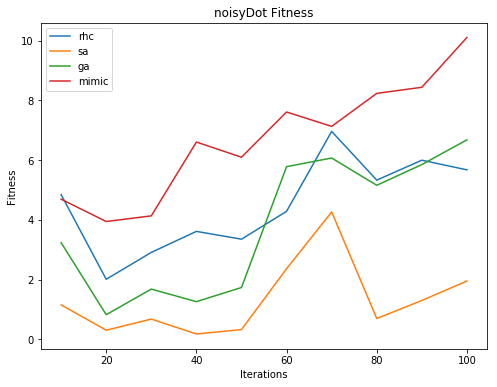

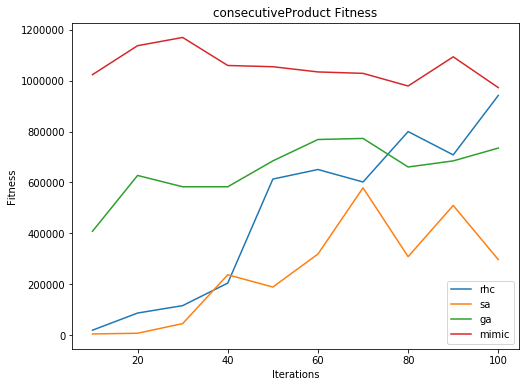

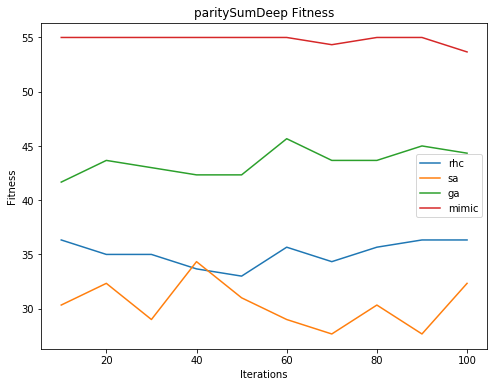

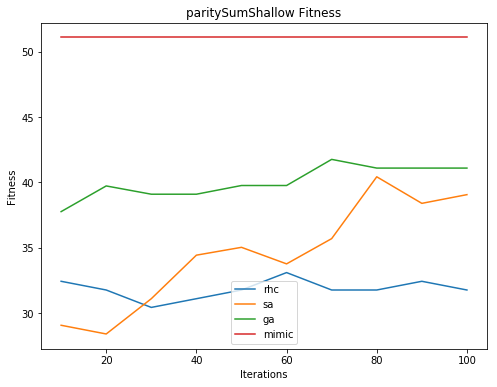

In [38]:


for problem in problems:
    plt.figure(figsize=(8, 6))
    for algo in algos:
        xs = results[problem][algo]['iterationsGraph']['iters']
        ys = results[problem][algo]['iterationsGraph']['fitness']
        plt.plot(xs, ys)

    plt.xlabel("Iterations")
    plt.ylabel("Fitness")
    plt.title(problem + " Fitness")
    plt.legend(algos)

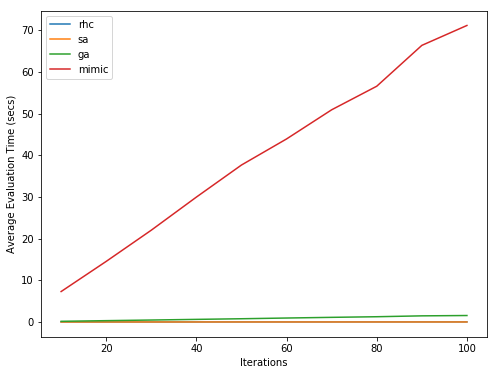

In [83]:

plt.figure(figsize=(8, 6))

for algo in algos:
    meanX = np.zeros(10)
    meanY = np.zeros(10)
    for problem in problems:
        meanX += np.array(results[problem][algo]['iterationsGraph']['iters'])
        meanY += np.array(results[problem][algo]['iterationsGraph']['time'])

    plt.plot(meanX/(len(problems)), meanY/(len(problems)))
    
plt.xlabel("Iterations")
plt.ylabel("Average Evaluation Time (secs)")
# plt.yscale('log')
plt.legend(algos)


In [54]:
cachedResults = {'noisyDot': {'rhc': {'iterationsGraph': {'iters': [],
    'fitness': [],
    'time': []},
   'problemSizeGraph': {'size': [10, 20, 30, 40, 50, 60, 70, 80],
    'fitness': [2.314749172948572,
     4.249274112511692,
     4.757496632751251,
     6.441698020387309,
     7.1801704984921555,
     8.424994364107764,
     8.72139883827135,
     9.918954091497497],
    'time': [0.3060816764831543,
     0.24045686721801757,
     0.19896767139434815,
     0.20199620723724365,
     0.2222059488296509,
     0.21502883434295655,
     0.23609564304351807,
     0.23417797088623046]}},
  'sa': {'iterationsGraph': {'iters': [], 'fitness': [], 'time': []},
   'problemSizeGraph': {'size': [10, 20, 30, 40, 50, 60, 70, 80],
    'fitness': [1.7722694640234227,
     3.130731211594888,
     3.5166274529284016,
     4.834556961209198,
     4.5632956563454075,
     6.595509923040737,
     6.726635805586371,
     7.232738357767313],
    'time': [0.05435855388641357,
     0.04188761711120605,
     0.0703120470046997,
     0.03650643825531006,
     0.06342859268188476,
     0.05235984325408936,
     0.033913469314575194,
     0.033107328414916995]}},
  'ga': {'iterationsGraph': {'iters': [], 'fitness': [], 'time': []},
   'problemSizeGraph': {'size': [10, 20, 30, 40, 50, 60, 70, 80],
    'fitness': [1.5980783039292636,
     3.7448180644950293,
     2.803744136512411,
     6.142560051837022,
     6.974330969135879,
     8.782829630385312,
     8.668263972233186,
     9.75142483808796],
    'time': [6.0661815166473385,
     6.840107750892639,
     6.678539776802063,
     7.729928326606751,
     4.5495370388031,
     7.760745978355407,
     9.509509420394897,
     3.96315758228302]}},
  'mimic': {'iterationsGraph': {'iters': [], 'fitness': [], 'time': []},
   'problemSizeGraph': {'size': [10, 20, 30, 40, 50, 60, 70, 80],
    'fitness': [2.2347439878763065,
     4.740562712449253,
     5.762376225782711,
     7.925504972078157,
     9.130413700116987,
     11.35805822106945,
     12.609388192460749,
     14.751044703095928],
    'time': [23.998633599281312,
     38.97706496715546,
     107.70717251300812,
     220.56056385040284,
     327.1583931207657,
     480.67072620391843,
     822.0589053630829,
     1245.569907450676]}}},
 'consecutiveProduct': {'rhc': {'iterationsGraph': {'iters': [],
    'fitness': [],
    'time': []},
   'problemSizeGraph': {'size': [10, 20, 30, 40, 50, 60, 70, 80],
    'fitness': [20.0,
     314.8,
     4534.0,
     70541.2,
     996864.0,
     15254304.0,
     225901180.8,
     3455063424.0],
    'time': [0.038098478317260744,
     0.03749971389770508,
     0.055052900314331056,
     0.06532564163208007,
     0.08397536277770996,
     0.10631604194641113,
     0.12237336635589599,
     0.14291374683380126]}},
  'sa': {'iterationsGraph': {'iters': [], 'fitness': [], 'time': []},
   'problemSizeGraph': {'size': [10, 20, 30, 40, 50, 60, 70, 80],
    'fitness': [18.8,
     292.8,
     4204.8,
     60312.0,
     845895.0,
     13995162.0,
     204074775.0,
     2790724320.0],
    'time': [0.7596682786941529,
     0.5163229465484619,
     0.452390193939209,
     0.19866461753845216,
     0.325529670715332,
     0.5370638370513916,
     0.31964261531829835,
     0.7267565965652466]}},
  'ga': {'iterationsGraph': {'iters': [], 'fitness': [], 'time': []},
   'problemSizeGraph': {'size': [10, 20, 30, 40, 50, 60, 70, 80],
    'fitness': [20.0,
     324.0,
     5042.4,
     67118.4,
     800236.8,
     9408096.0,
     110471040.0,
     1107357177.6],
    'time': [1.376618504524231,
     1.5522483587265015,
     2.6101200580596924,
     2.5132617235183714,
     3.122545623779297,
     2.9837251901626587,
     3.6805742502212526,
     3.2816240787506104]}},
  'mimic': {'iterationsGraph': {'iters': [], 'fitness': [], 'time': []},
   'problemSizeGraph': {'size': [10, 20, 30, 40, 50, 60, 70, 80],
    'fitness': [20.0,
     309.8,
     4892.4,
     69619.2,
     975250.8,
     13414392.0,
     201690864.0,
     3033361612.8],
    'time': [2.944031023979187,
     11.381064057350159,
     26.053031396865844,
     46.364612746238706,
     74.8739100933075,
     105.39199419021607,
     145.7780593395233,
     185.94567358493805]}}},
 'paritySumDeep': {'rhc': {'iterationsGraph': {'iters': [],
    'fitness': [],
    'time': []},
   'problemSizeGraph': {'size': [10, 20, 30, 40, 50, 60, 70, 80],
    'fitness': [12.2, 18.2, 24.6, 28.8, 35.8, 40.4, 47.0, 52.6],
    'time': [0.04039199352264404,
     0.034408164024353025,
     0.03390963077545166,
     0.03710067272186279,
     0.038795995712280276,
     0.0403918981552124,
     0.043587779998779295,
     0.04507944583892822]}},
  'sa': {'iterationsGraph': {'iters': [], 'fitness': [], 'time': []},
   'problemSizeGraph': {'size': [10, 20, 30, 40, 50, 60, 70, 80],
    'fitness': [10.8, 14.6, 20.2, 25.0, 29.4, 33.8, 40.2, 48.6],
    'time': [0.005086374282836914,
     0.005417752265930176,
     0.005086445808410644,
     0.0055850505828857425,
     0.005588889122009277,
     0.005784344673156738,
     0.006283235549926758,
     0.0059838533401489254]}},
  'ga': {'iterationsGraph': {'iters': [], 'fitness': [], 'time': []},
   'problemSizeGraph': {'size': [10, 20, 30, 40, 50, 60, 70, 80],
    'fitness': [15.0, 23.4, 31.0, 37.2, 44.6, 50.6, 57.2, 63.4],
    'time': [1.3274540424346923,
     1.6176777362823487,
     1.7262833833694458,
     1.7999864101409913,
     2.0013522863388062,
     2.080141234397888,
     2.437791872024536,
     2.3430339813232424]}},
  'mimic': {'iterationsGraph': {'iters': [], 'fitness': [], 'time': []},
   'problemSizeGraph': {'size': [10, 20, 30, 40, 50, 60, 70, 80],
    'fitness': [15.0, 25.0, 35.0, 45.0, 55.0, 64.8, 74.2, 84.2],
    'time': [2.9608777284622194,
     11.507625603675843,
     26.082444524765016,
     46.53276834487915,
     77.55050966739654,
     109.40225534439087,
     147.7549699306488,
     197.50166780948638]}}},
 'paritySumShallow': {'rhc': {'iterationsGraph': {'iters': [],
    'fitness': [],
    'time': []},
   'problemSizeGraph': {'size': [10, 20, 30, 40, 50, 60, 70, 80],
    'fitness': [8.899999999999999,
     14.699999999999998,
     20.9,
     25.9,
     31.3,
     36.900000000000006,
     42.500000000000014,
     47.500000000000014],
    'time': [0.04617640972137451,
     0.035206174850463866,
     0.03370985984802246,
     0.03979358673095703,
     0.03809819221496582,
     0.038700437545776366,
     0.04557421207427979,
     0.04069523811340332]}},
  'sa': {'iterationsGraph': {'iters': [], 'fitness': [], 'time': []},
   'problemSizeGraph': {'size': [10, 20, 30, 40, 50, 60, 70, 80],
    'fitness': [10.699999999999998,
     19.499999999999996,
     28.7,
     37.300000000000004,
     44.500000000000014,
     53.30000000000001,
     59.10000000000001,
     66.9],
    'time': [0.008477282524108887,
     0.011872076988220214,
     0.012267088890075684,
     0.013364267349243165,
     0.014956378936767578,
     0.015558409690856933,
     0.01575784683227539,
     0.016954946517944335]}},
  'ga': {'iterationsGraph': {'iters': [], 'fitness': [], 'time': []},
   'problemSizeGraph': {'size': [10, 20, 30, 40, 50, 60, 70, 80],
    'fitness': [11.099999999999998,
     19.099999999999998,
     27.1,
     33.7,
     40.86,
     47.10000000000001,
     54.28000000000001,
     59.89000000000001],
    'time': [1.314480996131897,
     1.498588490486145,
     1.9925959348678588,
     1.9254552602767945,
     2.1054731607437134,
     2.1024734497070314,
     3.017045760154724,
     2.587580180168152]}},
  'mimic': {'iterationsGraph': {'iters': [], 'fitness': [], 'time': []},
   'problemSizeGraph': {'size': [10, 20, 30, 40, 50, 60, 70, 80],
    'fitness': [11.099999999999998,
     21.099999999999998,
     31.1,
     41.10000000000001,
     51.10000000000001,
     61.10000000000001,
     70.70000000000002,
     80.50000000000001],
    'time': [2.9501108169555663,
     11.338378405570984,
     25.556758642196655,
     46.05244739055634,
     71.86990106105804,
     104.4111754655838,
     143.53944215774536,
     188.84411673545839]}}}}

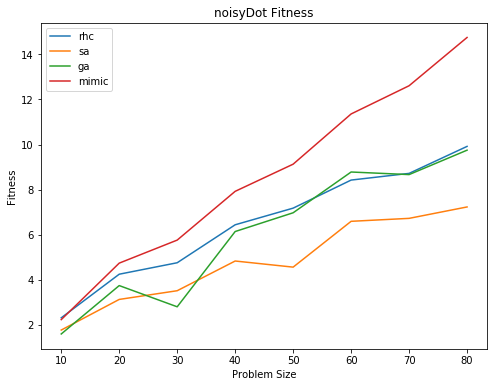

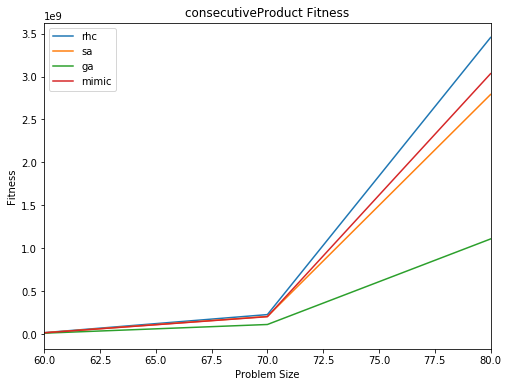

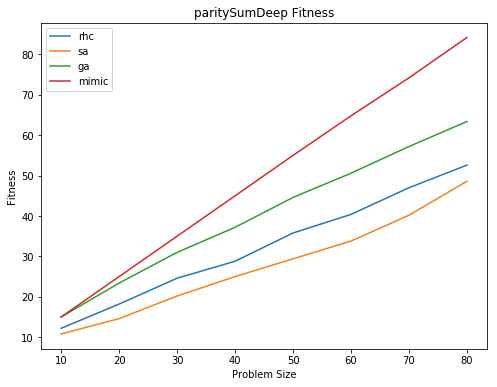

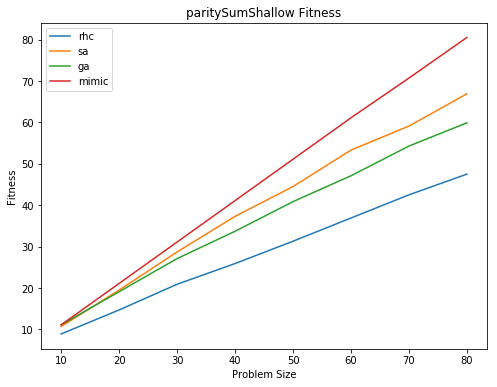

In [84]:
for problem in problems:
    plt.figure(figsize=(8, 6))
    for algo in algos:
        xs = cachedResults[problem][algo]['problemSizeGraph']['size']
        ys = cachedResults[problem][algo]['problemSizeGraph']['fitness']
        plt.plot(xs, ys)
    plt.xlabel("Problem Size")
    plt.ylabel("Fitness")
    if (problem == "consecutiveProduct"):
        plt.xlim(left=60, right=80)
    plt.title(problem + " Fitness")
    plt.legend(algos)

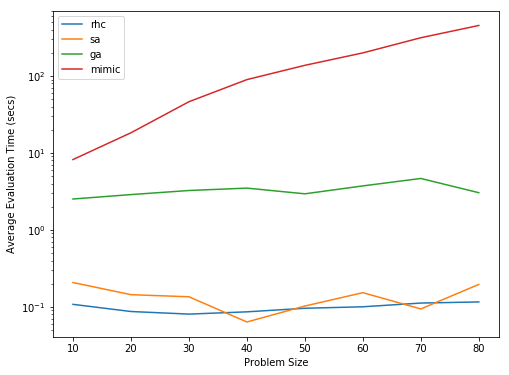

In [72]:
meanX = np.zeros(8)
meanY = np.zeros(8)

plt.figure(figsize=(8, 6))

for algo in algos:
    meanX = np.zeros(8)
    meanY = np.zeros(8)
    for problem in problems:
        meanX += np.array(cachedResults[problem][algo]['problemSizeGraph']['size'])
        meanY += np.array(cachedResults[problem][algo]['problemSizeGraph']['time'])

    plt.plot(meanX/(len(problems)), meanY/(len(problems)))
    
plt.xlabel("Problem Size")
plt.ylabel("Average Evaluation Time (secs)")
plt.yscale('log')
plt.legend(algos)

In [100]:
for problem in problems:
    print()
    print(problem)
    rate_hash = {}
    smallest = np.inf
    smallest_name = None
    algos_clone = algos[:]
    if (problem == "noisyDot"):
        algos_clone.remove("sa")
    elif (problem == "consecutiveProduct"):
        algos_clone.remove("ga")
    else:
        algos_clone.remove("rhc")
    for algo in algos_clone:
        rate_hash[algo] = sum(cachedResults[problem][algo]['problemSizeGraph']['fitness'])
        if rate_hash[algo] < smallest:
            smallest = rate_hash[algo]
            smallest_name = algo
    n = algos_clone[:]
    n.remove(smallest_name)
#     print(n)
    print(smallest_name + " 1X")
    for algo in n:
        print(algo + " " + str(rate_hash[algo]/smallest))


noisyDot
ga 1X
rhc 1.0730962347208357
mimic 1.4136099963195143

consecutiveProduct
sa 1X
rhc 1.2284563460132287
mimic 1.0796795639977073

paritySumDeep
sa 1X
ga 1.4483378256963162
mimic 1.788858939802336

paritySumShallow
ga 1X
sa 1.0916658138027495
mimic 1.2547333947395354
